<a href="https://colab.research.google.com/github/alanfmorato/MovieReview/blob/main/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando as notas**

In [24]:
import pandas as pd
import seaborn as sns

In [7]:
notas = pd.read_csv("ratings.csv")

**Verificando as 5 primeiras linhas do código**

In [8]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Verificando o tamanho do meu dataset (Linhas x colunas)**

In [10]:
notas.shape

(80090, 4)

**Renomeando colunas**

In [11]:
notas.columns = "usuarioId", "filmeId", "nota", "momento"

In [12]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Verificando coluna**

In [13]:
notas['nota']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
80085    3.5
80086    4.0
80087    4.5
80088    4.0
80089    4.5
Name: nota, Length: 80090, dtype: float64

**Verificando valores dentro da coluna nota**

In [14]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

**Quantidade de valores por classe de notas**

In [16]:
notas['nota'].value_counts()

4.0    21732
3.0    15952
5.0    10754
3.5    10255
4.5     6905
2.0     6140
2.5     3863
1.0     2178
1.5     1260
0.5     1051
Name: nota, dtype: int64

**Média das notas**

In [22]:
print(notas['nota'].mean())
print(notas.nota.median())

3.5216631289798976
3.5


**Plotando um histograma com as notas**

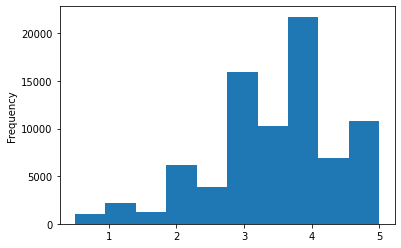

In [20]:
notas.nota.plot(kind='hist')

**Verificando a quantidade de dados por quartis, min e max**

In [23]:
notas.nota.describe()

count    80090.000000
mean         3.521663
std          1.037898
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

**Visualizando dados por boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


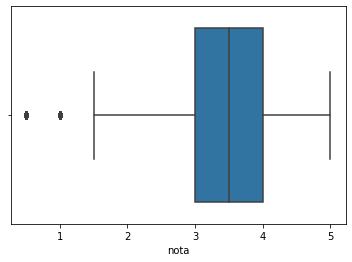

In [25]:
sns.boxplot(notas.nota)

# **Analisando os filmes**

In [32]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulos", "generos"]
filmes.head()

,filmeId,titulos,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Analisando as médias das notas do filme com ID 1**

In [35]:
notas.query("filmeId == 1").nota.mean()

3.954022988505747

**Agrupando os dados por filme ID**

In [41]:
medias_filmes = notas.groupby('filmeId').mean()['nota']
medias_filmes.head()

filmeId
1    3.954023
2    3.375000
3    3.340909
4    2.500000
5    3.151163
Name: nota, dtype: float64

**Histograma por medias dos filmes**

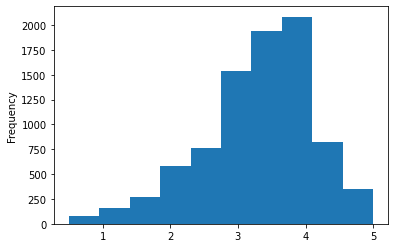

In [52]:
medias_filmes.plot(kind = "hist")

**Boxplot das medias**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


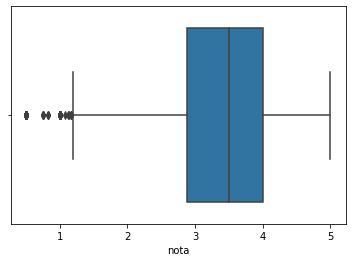

In [45]:
sns.boxplot(medias_filmes)

**Histograma plotado com seaborn**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


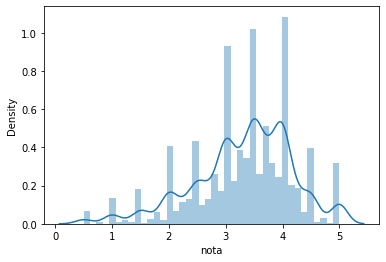

In [53]:
sns.distplot(medias_filmes, bins=40)
